# T-Test Exercises

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

from math import sqrt
from pydataset import data
import statistics

<hr style="border:2px solid gray">

1. Answer with the type of test you would use (assume normal distribution):
    - Is there a difference in grades of students on the second floor compared to grades of all students?
    - Are adults who drink milk taller than adults who dont drink milk?
    - Is the the price of gas higher in texas or in new mexico?
    - Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

<br>

2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

<br>

3. Load the mpg dataset and use it to answer the following questions:
    - Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
    - Are compact cars more fuel-efficient than the average car?
    - Do manual cars get better gas mileage than automatic cars?



<div class="alert alert-block alert-success">

In order to answer questions 2 & 3, we will break down statistical testing.
<br>
<br>
<b>Step-by-Step</b>
1. Plot distribution
2. Set Hypothesis
3. Set Alpha
4. Verify 3 Assumptions
5. Compute Test Statistics
6. Decide
    
</div> 

<hr style="border:2px solid black">
<hr style="border:2px solid black">

#### #1. Answer with the type of test you would use (assume normal distribution):

a. Is there a difference in grades of students on the second floor compared to grades of all students?

b. Are adults who drink milk taller than adults who don't drink milk?

c. Is the the price of gas higher in Texas or in New Mexico?

d. Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

<hr style="border:2px solid black">
<hr style="border:2px solid black">

#### #2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices

<div class="alert alert-block alert-info">

<b>Let's break it down:</b> 
    <br>
- compare average time selling homes is different at 2 offices
<br>
- office 1: sample size = 40, mean= 90, stddev = 15
    <br>
- office 2: sample size= 50, mean= 100, stddev = 20
    <br>
- alpha = .05
</div>

<b>We are comparing</b>: average time (numeric/continuous) vs two offices (distinct/categorical)
<br>

Therefore, we will use:
- 2 sample t-test: comparing two offices
- 2 tailed: want to know if the average is larger OR smaller in either office 

<hr style="border:1px solid black">

##### Step 1: Plot Distribution

In [2]:
#stats.norm(mean, std).rvs(# samples)
office_1 = stats.norm(90, 15).rvs(40)
office_2 = stats.norm(100, 20).rvs(50)

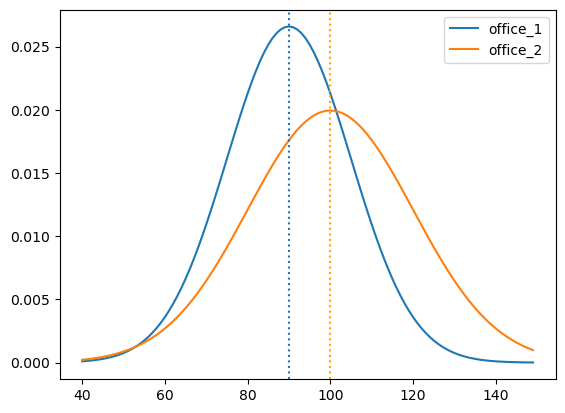

In [3]:
x= np.arange(40,150)

y1 = stats.norm(90,15).pdf(x) #this gives graph for office 1
y2 = stats.norm(100,20).pdf(x) #this gives graph for office 2

plt.plot(x, y1, label='office_1')
plt.plot(x,y2, label = 'office_2')
plt.axvline(90, ls=':')
plt.axvline(100, ls=':', color='orange')

plt.legend()
plt.show()

In [4]:
#let's get the average time to sell homes of office 1
avg_y1 = np.mean(y1)
avg_y1

0.009087128324877411

In [5]:
#let's get the average time to sell homes of office 2
avg_y2= np.mean(y2)
avg_y2

0.009019101164009186

##### Step 2: Set Hypothesis

$H_0$: The variance in office 1 is equivalent to the variance in office 2
<br>
$H_a$: The variance in office 2 is inequal to the variance in office 1

##### Step 3: Set Alpha

In [6]:
#we can use our typical alpha for this example
α = .05

##### Step 4: Verify Assumptions

<div class="alert alert-block alert-info">
<b>We need to ask ourselves:</b> 

1. Are the samples independent? 
    - YES, two seperate data sets
2. Is there normality?      
    - YES, there is normal distribution visually
    - YES, sample sizes are 50 and 40
3. Is there equal variance?  
    - False (see below)
</div>    

#2. Is there normality?

In [56]:
# to find sample size- must more than 30 to meet assumption
len(office_1), len(office_2)

(40, 50)

#3 Is there equal variance?

In [7]:
#this shows the variance is not the same. must set variance to false
y1.var(), y2.var()

(8.839047447475672e-05, 4.684978789008453e-05)

In [8]:
#we can also do a levene test
stat, p_val = stats.levene(office_1, office_2)

In [9]:
if p_val < 0.05:
    print('We can reject H0 ==> inequal variance')

We can reject H0 ==> inequal variance


##### Step 5: Compute Test Statistics

In [10]:
# 2 sample. 2 tailed
t, p = stats.ttest_ind(office_1, office_2, equal_var=False)
t, p, α

(-3.4112742068811897, 0.001020569588833405, 0.05)

In [11]:
p < α

True

##### Step 6: Decide

In [12]:
if p < α:
    print('Our p-value is less than alpha and we can reject the null hypothesis, indicating some difference in the sales time between the offices')

Our p-value is less than alpha and we can reject the null hypothesis, indicating some difference in the sales time between the offices


<div class="alert alert-block alert-info">
<b>Note:</b> 
    <br>
We note that simulating the random values from the distributive stats are not providing us with the level of detail that we may want out of a problem like this. In order to get the most ideal results possible, we will conduct a slightly different variation of the test using ttest_ind_from_stats, which is more alligned with the information that has been posited to us in this specific scenario.
</div>  

In [13]:
t, p = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var=False)
t, p

(-2.7091418459143854, 0.00811206270346016)

In [14]:
if p < α:
    print('Our p-value is less than alpha and we can reject the null hypothesis, indicating some difference in the sales time between the offices.')

Our p-value is less than alpha and we can reject the null hypothesis, indicating some difference in the sales time between the offices.


<hr style="border:2px solid black">
<hr style="border:2px solid black">

#### #3. Load the mpg dataset and use it to answer the following questions:
- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

In [15]:
#import the data
mpg = data('mpg')

In [16]:
#take a peak at the data
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


<div class="alert alert-block alert-info">
<b>Think it through:</b> 
<br>
To answer this set of question, we need to create a new column of average mileage
    <br>
- engineer an average mileage column in order to make the fuel efficiency comparisons
    <br>
- capture transmissions that are automatic or manual for that specific comparison
</div>    

Calculate average fuel economy assuming 50% highway and 50% city driving
- Should I use arithmetic mean or harmonic mean for average mpg?
    - Arithmetic Mean: fe_am = (cty + hwy)/2
    - Harmonic Mean: fe_hm = 2/(1/cty + 1/hwy)

In [17]:
#find the mean of cty and hwy combined and create a new column
mpg['avg_fe'] = stats.hmean(mpg[['cty','hwy']], axis=1)

In [18]:
#look at our new data
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


<hr style="border:0.5px solid black">

### A) Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

<div class="alert alert-block alert-info">
<b>Let's break it down:</b> 
<br>
- We are looking to compare values across car manufactured specifically in 2008 versus cars specifically in 1999  
    <br>
</div>    

<b>We are comparing</b>: average mileage (numeric/continious) vs two different years (distinct/categorical)
<br>
<br>
Therefore, we will use:
<br>
<br>
2 sample t-test: comparing two years
    <br>
2 tailed: wants the difference (not if one is less or more)
    <br>
Perform a ttest_ind on these two subsets of our data

In [19]:
#create new panda series for each year we are comparing
ninenine_fuel = mpg[mpg.year == 1999].avg_fe
oeight_fuel = mpg[mpg.year == 2008].avg_fe

<b>Step 1: Plot Distribution</b>

<AxesSubplot:>

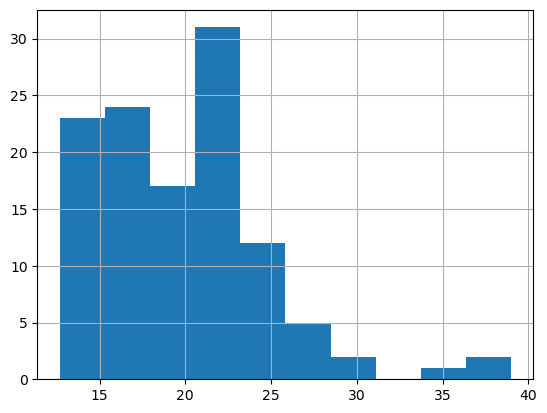

In [20]:
#Let's look at 1999's distribution
ninenine_fuel.hist()

<AxesSubplot:>

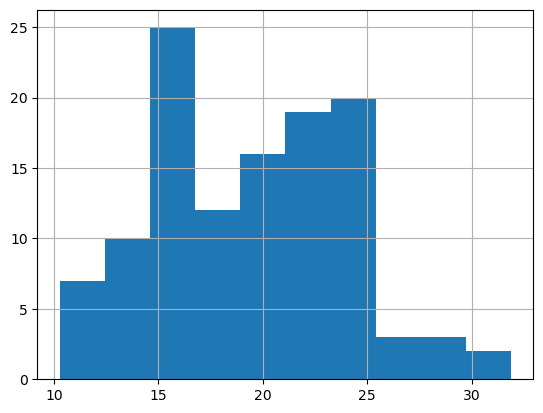

In [21]:
#Let's look at 2008's distribution
oeight_fuel.hist()

<b> Step 2: Set Hypothesis</b>
<br>
- $H_0$: The fuel efficiency in cars made in 2008 is equal to the fuel efficiency in cars manufactured in 1999
<br>
- $H_a$: The fuel efficiency in cars made in 2008 is inequal to the fuel efficiency in cars manufactured in 1999

<b>Step 3: Set Alpha

In [22]:
α= .05

<b>Step 4: Verify Assumptions</b>

<div class="alert alert-block alert-info">
<b>We need to ask ourselves:</b> 

1. Are the samples independent? 
    - YES, two seperate data sets
    - If they were not independent, pandas masking would not have worked the way it did
2. Is there normality?      
    - YES, we are told in the example that it is normal distribution
    - NOT normal BUT there are more than 30 sample size (see below)
3. Is there equal variance?  
    - Yes, proved by levene test (see below)
</div>    

#2. Normal distribution or Sample size larger than 30?

In [23]:
# to find sample size- must more than 30 to meet assumption
ninenine_fuel.count(), oeight_fuel.count()

(117, 117)

#3. Is there equal variance?

In [24]:
stat, pval = stats.levene(ninenine_fuel, oeight_fuel)
if pval < α:
    print('we can reject the null hypothesis and posit that variance is inequal')

<b>Step 5: Compute Test Statistics</b>

In [25]:
t, p = stats.ttest_ind(oeight_fuel, ninenine_fuel)
t,p, α

(-0.3011962975077886, 0.7635345888327115, 0.05)

In [26]:
p < α

False

<b>Step 6: Decide</b>

In [27]:
print(f'''
Because p ({pval:.3f}) > alpha (.05), we fail to reject the null\
 hypothesis that there is no difference in fuel-efficency in cars\
 from 2008 and 1999.
''')


Because p (0.860) > alpha (.05), we fail to reject the null hypothesis that there is no difference in fuel-efficency in cars from 2008 and 1999.



<hr style="border:0.5px solid black">

### B) Are compact cars more fuel-efficient than the average car?

<div class="alert alert-block alert-info">
<b>We are comparing</b>: average mileage (numeric/continious) vs two car types (distinct/categorical)
<br>
<br>
Therefore, we will use:
<br>
<br>
one sample- only looking at compact cars average
<br>
one tailed- MORE fuel efficient (as opposed to: is there a difference in fuel)
    </div> 

In [28]:
#Let's create a dataset for only compact car mileage
fuel_compact = mpg[mpg['class'] == 'compact'].avg_fe

#Let's create a dataset for overall mileage
fuel_overall = mpg.avg_fe.mean()

<b>Step 1: Plot Distribution</b>

(array([ 9., 13., 14.,  5.,  2.,  2.,  1.,  0.,  0.,  1.]),
 array([18.75      , 20.64642857, 22.54285714, 24.43928571, 26.33571429,
        28.23214286, 30.12857143, 32.025     , 33.92142857, 35.81785714,
        37.71428571]),
 <BarContainer object of 10 artists>)

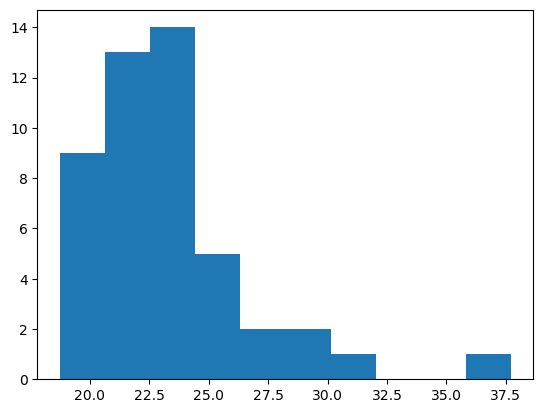

In [29]:
# look at the distribution. N >30
plt.hist(fuel_compact)

<AxesSubplot:>

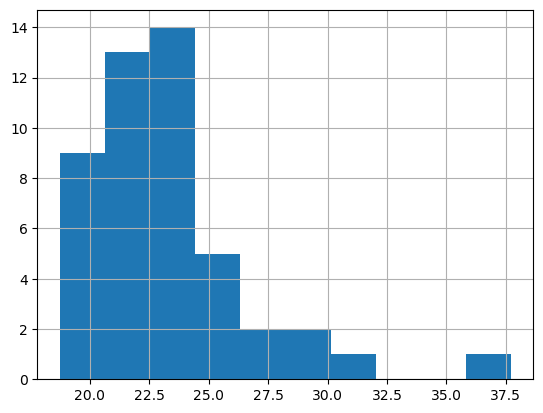

In [30]:
fuel_compact.hist()

In [31]:
t, p = stats.ttest_1samp(fuel_compact, fuel_overall)
t, p

(7.512360093161354, 1.5617666348807674e-09)

<b>Step 2: Set Hypothesis</b>

- $H_0$: : there is no between compact car fuel-efficiency and the average fuel efficiency
<br>
- $H_a$: there is a between compact car fuel-efficiency and the average fuel efficiency

<b>Step 3: Set Alpha</b>

In [32]:
α = 0.05

<b>Step 4: Verify Assumption</b>

<div class="alert alert-block alert-info">
<b>We need to ask ourselves:</b> 

1. Are the samples independent? 
    - Not relevant- there is only one sample
2. Is there normality?      
    - roughly normal distibution 
    - there are more than 30 sample size (see below)
3. Is there equal variance?  
    - Not relevant- there is only one sample
</div> 

#2. Is there normality?

In [33]:
#must be more than 30
fuel_compact.count()

47

<b>Step 5: Compute Test Statistics</b>

In [34]:
t, p = stats.ttest_1samp(fuel_compact, fuel_overall)
t,p

(7.512360093161354, 1.5617666348807674e-09)

<b>Step 6: Decide</b>

In [35]:
if (t > 0) and ((p/2) < α):
    print('we can reject the null hypothesis')

we can reject the null hypothesis


In [36]:
print(f'''
Because p/2 ({p/2:.12f}) < alpha (.05), we reject the null hypothesis that there isno difference in fuel-efficiency between compact cars and the overall average.
''')


Because p/2 (0.000000000781) < alpha (.05), we reject the null hypothesis that there isno difference in fuel-efficiency between compact cars and the overall average.



<hr style="border:0.5px solid black">

### C) Do manual cars get better gas mileage than automatic cars?

In [37]:
# we will look at average fuel efficiency for auto cars, and manual cars
manual_fe = mpg[mpg.trans.str.contains('manual')].avg_fe
auto_fe = mpg[mpg.trans.str.contains('auto')].avg_fe

<b>Step 1: Plot distribution</b>

(array([ 2.,  9., 10., 21., 23.,  5.,  4.,  1.,  0.,  2.]),
 array([10.28571429, 13.15587703, 16.02603978, 18.89620253, 21.76636528,
        24.63652803, 27.50669078, 30.37685353, 33.24701627, 36.11717902,
        38.98734177]),
 <BarContainer object of 10 artists>)

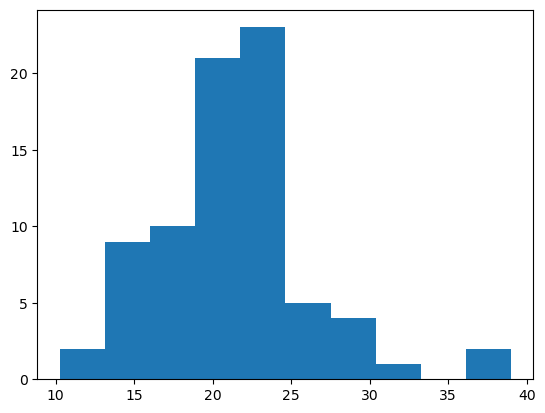

In [38]:
# look at the distribution. N >30
plt.hist(manual_fe)

(array([ 6., 35., 27., 22., 33., 18.,  9.,  4.,  2.,  1.]),
 array([10.28571429, 12.65428571, 15.02285714, 17.39142857, 19.76      ,
        22.12857143, 24.49714286, 26.86571429, 29.23428571, 31.60285714,
        33.97142857]),
 <BarContainer object of 10 artists>)

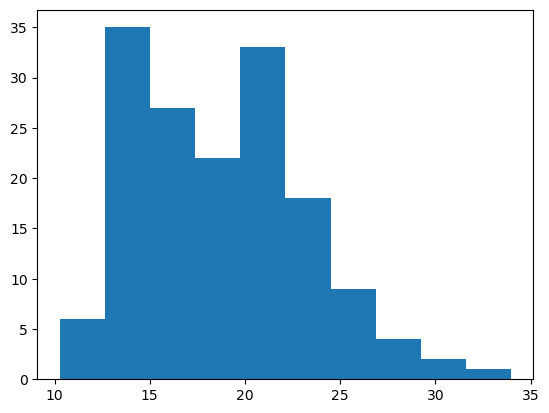

In [39]:
# look at the distribution. N >30
plt.hist(auto_fe)

<b>Step 2: Set Hypothesis</b>

- $H_0$: The average mileage of manual cars =< the average mileage in automatic cars
<br>
- $H_a$: The average mileage of manual cars > the average mileage in automatic cars

<b>Step 3: Set Alpha</b>

In [40]:
α = 0.05

<b>Step 4: Verify 3 Assumptions</b>

<div class="alert alert-block alert-info">
<b>We need to ask ourselves:</b> 

1. Are the samples independent? 
    - Yes, dealing with manual AND automatic cars
2. Is there normality?      
    - YES, normal distibution 
    - YES, there are more than 30 sample size (see below)
3. Is there equal variance?  
    - False, proved by levene test (see below)
</div> 

#2. Is there normality?

In [41]:
#must be more than 30
auto_fe.count(), auto_fe.count()

(157, 157)

#3. Is there equal variance?

In [42]:
#check variance
auto_fe.var(), manual_fe.var()

(20.428279095002054, 25.665633639828275)

In [43]:
stats.levene(manual_fe, auto_fe)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

<b>Step 5: Compute Test Statistics</b>

In [44]:
t, p = stats.ttest_ind(manual_fe, auto_fe, equal_var = False)
t,p

(4.47444321386703, 1.5980702702079528e-05)

<b>Step 6: Decide</b>

In [45]:
if (t > 0) and ((p/2) < α):
    print('We can reject our null hypothesis')
else:
    print('we cannot reject our null hypothesis')

We can reject our null hypothesis


In [46]:
print(f'''
Because p/2 ({p/2:.6f}) < alpha (.05), we reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars
''')


Because p/2 (0.000008) < alpha (.05), we reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars



In [47]:
## just look at the means to visually confirm your decision
manual_fe.mean(), auto_fe.mean()

(21.629228592155194, 18.583199507835747)

^-- 21.63 is not the same as 18.58 SO... the null that there is NO difference in fuel economy is rejected